In [1]:
from time import time as now
import numpy as np
import smoothing, eval, sys, path_generator
from main import eval_time
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [42]:
path_rw, _ = path_generator.generate_random_walk(N=30)
path_rw_kalman = np.array(smoothing.kalman(path_rw))
path_rw_bezier_sp = np.array(smoothing.bezier_divided(path_rw))

In [43]:
path_rrt, obstacles = path_generator.generate_rrt(N=30)
path_rrt_kalman = np.array(smoothing.kalman(path_rrt))
path_rrt_bezier = np.array(smoothing.bezier(path_rrt))
path_rrt_bezier_sp = np.array(smoothing.bezier_divided(path_rrt))

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial.distance import cdist
from main import N_LIST
from eval import path_angle

path_rw = np.array(path_rw)
path_rrt = np.array(path_rrt)
path_length_rw = int(np.sqrt(np.sum(np.diff(path_rw, axis=1)**2, axis=0))[0])
path_length_rrt = int(np.sqrt(np.sum(np.diff(path_rrt, axis=1)**2, axis=0))[0])

angle_rw = path_angle(path_rw)
angle_rw_kalman = path_angle(path_rw_kalman)
angle_rw_bezier_sp = path_angle(path_rw_bezier_sp)
angle_rrt = path_angle(path_rrt)
angle_rrt_kalman = path_angle(path_rrt_kalman)
angle_rrt_bezier_sp = path_angle(path_rrt_bezier_sp)
angle_rrt_bezier = path_angle(path_rrt_bezier)

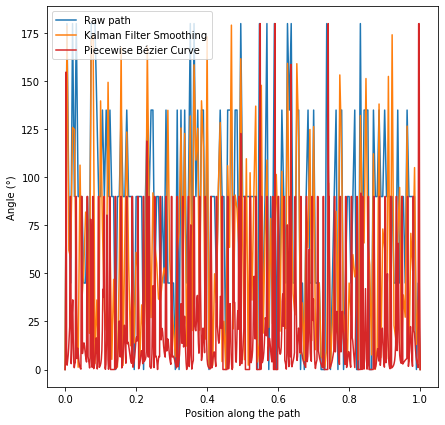

In [41]:
# Rotation along path RW
plt.figure(figsize=(7,7))


plt.plot(np.linspace(0,1,len(angle_rw)), angle_rw, color='#1f77b4', label='Raw path')
plt.plot(np.linspace(0,1,len(angle_rw_kalman)), angle_rw_kalman, color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(np.linspace(0,1,len(angle_rw_bezier_sp)), angle_rw_bezier_sp, color='#d62728', label='Piecewise Bézier Curve')

#plt.title('Rotation angle along the path')
plt.legend(loc='upper left')
plt.ylabel('Angle (°)')
plt.xlabel('Position along the path')
#plt.show()
#plt.savefig('rotation_rw.png')

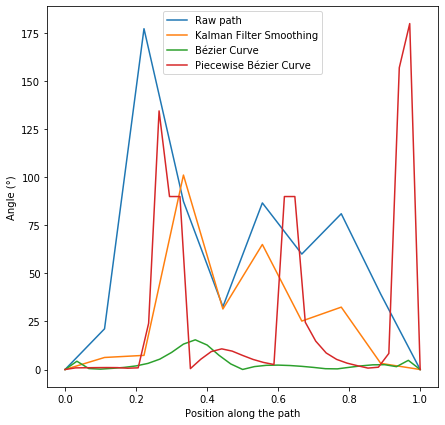

In [16]:
# Rotation along path RRT*
plt.figure(figsize=(7,7))

plt.plot(np.linspace(0,1,len(angle_rrt)), angle_rrt, color='#1f77b4', label='Raw path')
plt.plot(np.linspace(0,1,len(angle_rrt_kalman)), angle_rrt_kalman, color='#ff7f0e', label='Kalman Filter Smoothing')
plt.plot(np.linspace(0,1,len(angle_rrt_bezier)), angle_rrt_bezier, color='#2ca02c', label='Bézier Curve')
plt.plot(np.linspace(0,1,len(angle_rrt_bezier_sp)), angle_rrt_bezier_sp, color='#d62728', label='Piecewise Bézier Curve')

#plt.title('Rotation angle along the path')
plt.legend()
plt.ylabel('Angle (°)')
plt.xlabel('Position along the path')
#plt.savefig('rotation_rrt.png')

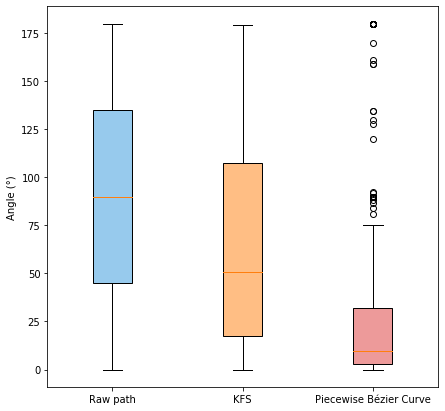

In [45]:
# Boxplot RW
plt.figure(figsize=(7,7))

bplot = plt.boxplot([angle_rw, angle_rw_kalman, angle_rw_bezier_sp], labels=['Raw path', 'KFS', 'Piecewise Bézier Curve'], patch_artist=True)

colors = ['#97caed', '#ffbe84', '#ed9a9a']
#colors = ['#1f77b4', '#ff7f0e', '#d62728']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Angle (°)')
#plt.title('Mean rotation angle')
plt.savefig('boxplot_rw.png')

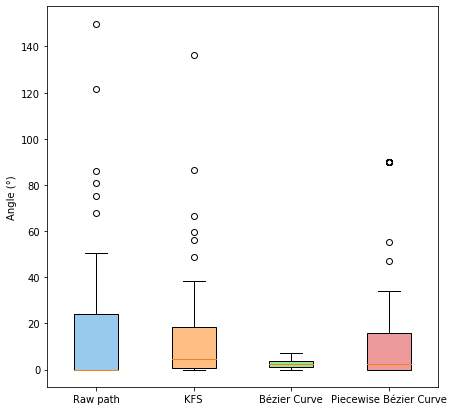

In [48]:
# Boxplot RRT*
plt.figure(figsize=(7,7))


bplot = plt.boxplot([angle_rrt, angle_rrt_kalman, angle_rrt_bezier, angle_rrt_bezier_sp], labels=['Raw path', 'KFS', 'Bézier Curve', 'Piecewise Bézier Curve'], patch_artist=True)

colors = ['#97caed', '#ffbe84', '#99e399', '#ed9a9a']
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Angle (°)')
#plt.title('Mean rotation angle')
plt.savefig('boxplot_rrt.png')

In [59]:
print(path_length_rw)
print(path_length_rrt)
print(np.median(angle_rrt))
print(np.median(angle_rrt_kalman))
print(np.max(angle_rrt_bezier))
print(np.mean(angle_rrt_bezier_sp))

5799
3351
0.0
4.446694301401513
7.091964661131173
19.888235720402033
